In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB


In [4]:
# Load datasets
train_path = 'C:/Users/ssind/OneDrive/Desktop/mlops exam/train.csv'
test_path = 'C:/Users/ssind/OneDrive/Desktop/mlops exam/test.csv'


In [5]:
# Handle encoding and read the data
train_data = pd.read_csv('C:/Users/ssind/OneDrive/Desktop/mlops exam/train.csv', encoding='latin1')
test_data = pd.read_csv('C:/Users/ssind/OneDrive/Desktop/mlops exam/test.csv', encoding='latin1')

In [6]:
# EDA
print("\n--- Training Data Overview ---")
print(train_data.info())
print("\n--- Test Data Overview ---")
print(test_data.info())


--- Training Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
None

--- Test Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  


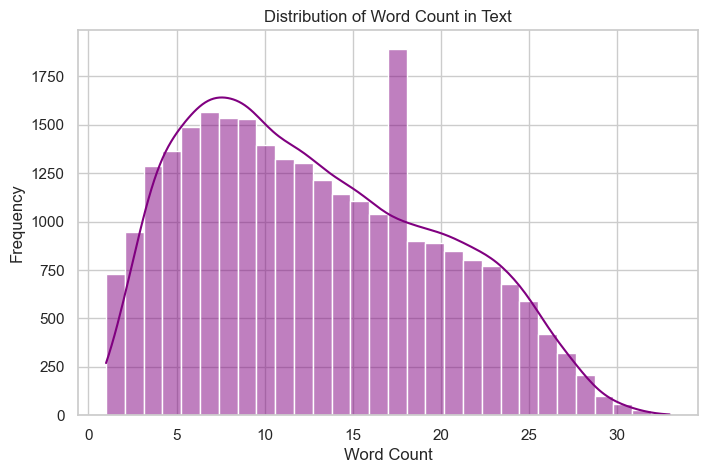

In [8]:
# 2. Word Count Distribution
train_data['word_count'] = train_data['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 5))
sns.histplot(data=train_data, x='word_count', bins=30, kde=True, color='purple')
plt.title("Distribution of Word Count in Text")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

C:\Users\ssind\AppData\Local\Temp\ipykernel_8772\575997848.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


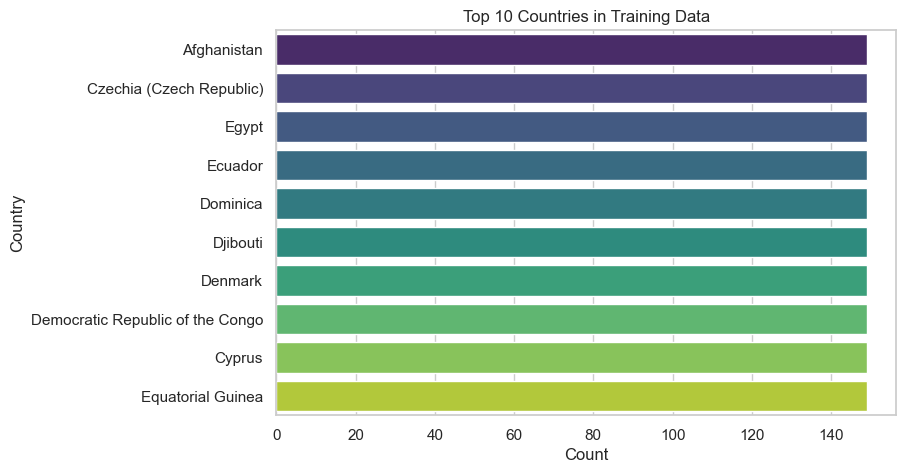

In [10]:
# 4. Country-wise Distribution (Top 10 Countries)
if 'Country' in train_data.columns:
    top_countries = train_data['Country'].value_counts().head(10)
    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
    plt.title("Top 10 Countries in Training Data")
    plt.xlabel("Count")
    plt.ylabel("Country")
    plt.show()

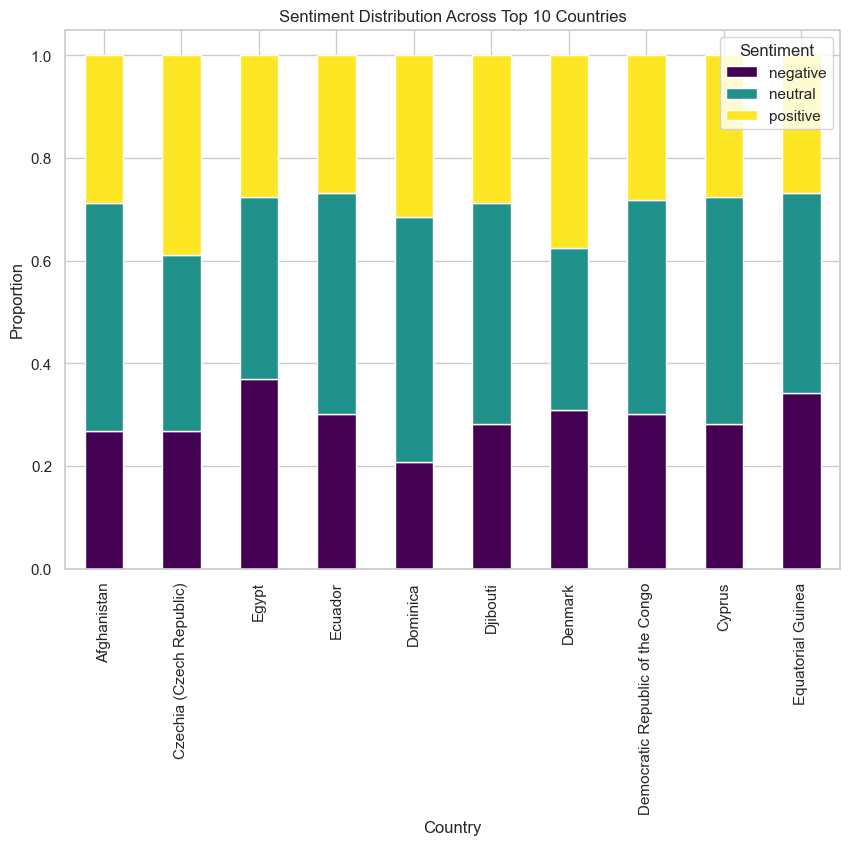

In [12]:
# 8. Sentiment Distribution Over Countries
if 'Country' in train_data.columns:
    sentiment_country = train_data.groupby('Country')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
    top_countries_sentiment = sentiment_country.loc[top_countries.index]
    top_countries_sentiment.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
    plt.title("Sentiment Distribution Across Top 10 Countries")
    plt.xlabel("Country")
    plt.ylabel("Proportion")
    plt.legend(title="Sentiment")
    plt.show()

In [13]:
# Check for missing values
print("\n--- Missing Values in Training Data ---")
print(train_data.isnull().sum())
print("\n--- Missing Values in Test Data ---")
print(test_data.isnull().sum())


--- Missing Values in Training Data ---
textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
word_count          0
dtype: int64

--- Missing Values in Test Data ---
textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64


C:\Users\ssind\AppData\Local\Temp\ipykernel_8772\1020614465.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


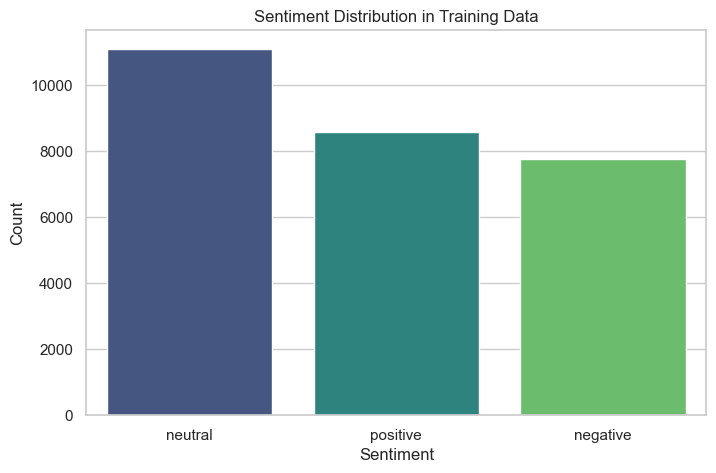

In [14]:
# Sentiment distribution in training data
sentiment_counts = train_data['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution in Training Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

C:\Users\ssind\AppData\Local\Temp\ipykernel_8772\1919735610.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


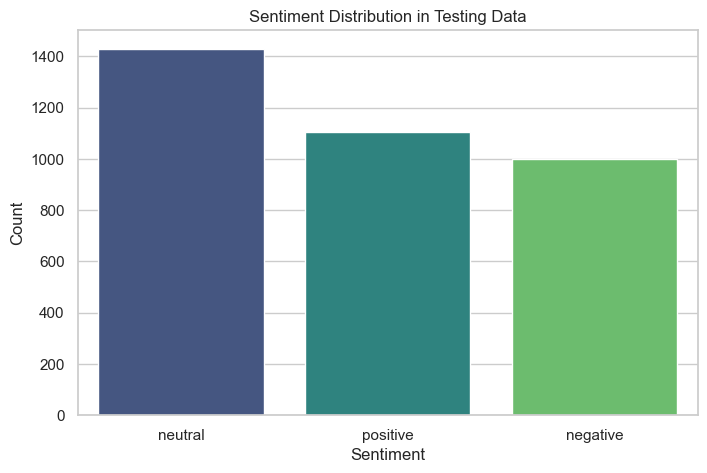

In [15]:
# Sentiment distribution in training data
sentiment_counts = test_data['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution in Testing Data")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [16]:
# Handling missing values
train_data = train_data.dropna(subset=['text', 'selected_text'])
test_data = test_data.dropna(subset=['text'])

In [17]:
# Text preprocessing
def preprocess_text(df):
    df['text'] = df['text'].str.lower().str.strip()
    return df

train_data = preprocess_text(train_data)
test_data = preprocess_text(test_data)

In [18]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train_data['text'])
y = train_data['sentiment']

In [19]:
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Initialize models for comparison
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    
}

In [21]:
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"\nTraining and evaluating: {model_name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred))
    results[model_name] = acc


Training and evaluating: Logistic Regression
Accuracy: 0.6901
              precision    recall  f1-score   support

    negative       0.71      0.59      0.64      1572
     neutral       0.63      0.75      0.68      2236
    positive       0.78      0.71      0.74      1688

    accuracy                           0.69      5496
   macro avg       0.71      0.68      0.69      5496
weighted avg       0.70      0.69      0.69      5496


Training and evaluating: Random Forest
Accuracy: 0.6796
              precision    recall  f1-score   support

    negative       0.73      0.51      0.60      1572
     neutral       0.61      0.77      0.68      2236
    positive       0.76      0.72      0.74      1688

    accuracy                           0.68      5496
   macro avg       0.70      0.67      0.67      5496
weighted avg       0.69      0.68      0.68      5496



In [22]:
# Evaluate Naive Bayes separately
print("\n--- Evaluating Naive Bayes ---")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_val)
acc_nb = accuracy_score(y_val, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
print(classification_report(y_val, y_pred_nb))
results["Naive Bayes"] = acc_nb



--- Evaluating Naive Bayes ---
Naive Bayes Accuracy: 0.6352
              precision    recall  f1-score   support

    negative       0.73      0.46      0.57      1572
     neutral       0.56      0.79      0.65      2236
    positive       0.75      0.58      0.66      1688

    accuracy                           0.64      5496
   macro avg       0.68      0.61      0.63      5496
weighted avg       0.67      0.64      0.63      5496




Evaluating Log Loss for: Logistic Regression
Log Loss: 0.7333

Evaluating Log Loss for: Random Forest
Log Loss: 0.7682


C:\Users\ssind\AppData\Local\Temp\ipykernel_8772\416799336.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(valid_log_loss_results.keys()), y=list(valid_log_loss_results.values()), palette="viridis")


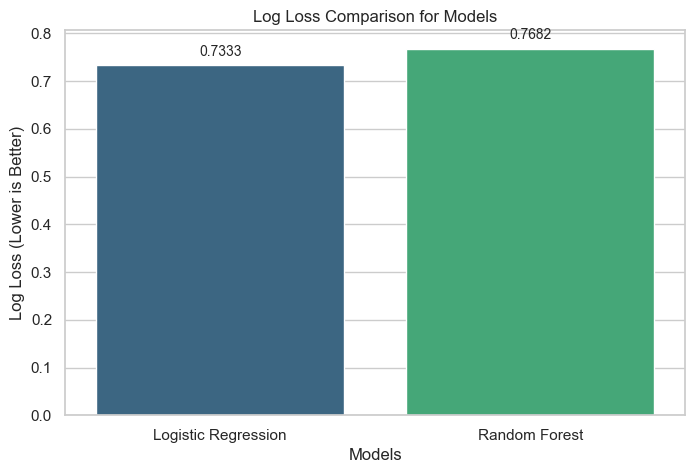

In [24]:
from sklearn.metrics import log_loss

# Evaluate each model for log loss
log_loss_results = {}

for model_name, model in models.items():
    print(f"\nEvaluating Log Loss for: {model_name}")
    # Predict probabilities instead of classes
    try:
        y_pred_proba = model.predict_proba(X_val)
        log_loss_value = log_loss(y_val, y_pred_proba)
        log_loss_results[model_name] = log_loss_value
        print(f"Log Loss: {log_loss_value:.4f}")
    except AttributeError:
        print(f"{model_name} does not support probability prediction.")
        log_loss_results[model_name] = None

# Plot log loss results
valid_log_loss_results = {k: v for k, v in log_loss_results.items() if v is not None}
plt.figure(figsize=(8, 5))
sns.barplot(x=list(valid_log_loss_results.keys()), y=list(valid_log_loss_results.values()), palette="viridis")
plt.title("Log Loss Comparison for Models")
plt.xlabel("Models")
plt.ylabel("Log Loss (Lower is Better)")
for i, ll in enumerate(valid_log_loss_results.values()):
    plt.text(i, ll + 0.02, f"{ll:.4f}", ha='center', fontsize=10)
plt.show()



Calculating Log Loss for Naive Bayes...
Naive Bayes Log Loss: 0.8439


C:\Users\ssind\AppData\Local\Temp\ipykernel_8772\1570342654.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Naive Bayes"], y=[log_loss_nb], palette="viridis")


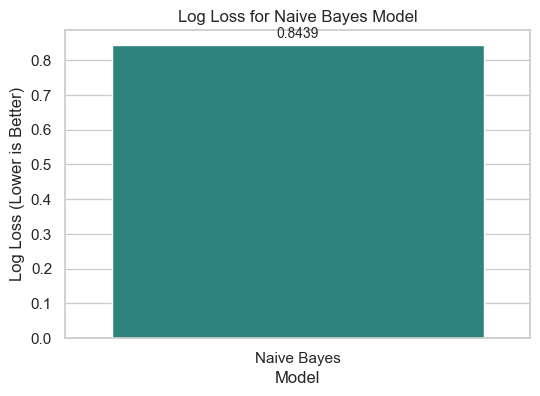

In [33]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate log loss for Naive Bayes
print("\nCalculating Log Loss for Naive Bayes...")
y_pred_proba_nb = nb_model.predict_proba(X_val)  # Get predicted probabilities
log_loss_nb = log_loss(y_val, y_pred_proba_nb)  # Calculate log loss
print(f"Naive Bayes Log Loss: {log_loss_nb:.4f}")

# Plot Log Loss for Naive Bayes
plt.figure(figsize=(6, 4))
sns.barplot(x=["Naive Bayes"], y=[log_loss_nb], palette="viridis")
plt.title("Log Loss for Naive Bayes Model")
plt.xlabel("Model")
plt.ylabel("Log Loss (Lower is Better)")
plt.text(0, log_loss_nb + 0.02, f"{log_loss_nb:.4f}", ha='center', fontsize=10)
plt.show()



In [35]:
# Identify the best model based on log loss (lower is better)
best_log_loss_model = min(log_loss_results, key=log_loss_results.get)
print(f"\n--- Best Model Based on Log Loss: {best_log_loss_model} with Log Loss: {log_loss_results[best_log_loss_model]:.4f} ---")



--- Best Model Based on Log Loss: Logistic Regression with Log Loss: 0.7333 ---


In [26]:
# Predictions on test data using the best model
test_X = vectorizer.transform(test_data['text'])
final_model = models[best_model]
test_data['predicted_sentiment'] = final_model.predict(test_X)

In [27]:
# Save predictions
test_data.to_csv('test_predictions.csv', index=False)
print("Predictions saved to 'test_predictions.csv'")

Predictions saved to 'test_predictions.csv'
